### Import Required Libraries

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Import Model Evaluation Tools 

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

### Import Machine Learning Models

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

### Suppress Warnings

In [16]:
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [17]:
# Load the dataset.
df = pd.read_csv("C:/Users/Rutvik/OneDrive/Desktop/CODESOFT INTERNSHIP TASK/CODESOFT_Task3_Customer_Churn_Prediction/Bank Customer Churn Prediction/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Data Cleaning

In [18]:
# Drop unnecessary columns.
df.drop("CustomerId", axis=1, inplace=True)
df["TotalCharges"] = pd.to_numeric(df.get("TotalCharges", pd.Series([0]*len(df))), errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)
df["Churn"] = df["Exited"] if 'Exited' in df.columns else df["Churn"]
df.drop("Exited", axis=1, errors='ignore', inplace=True)
df = df.dropna()

### Simplify Categorical Data

In [19]:
# Convert categorical variables to numerical.
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].replace({"No internet service": "No", "No phone service": "No"})

### Categorical Column Classification

In [20]:
# List categorical columns and identify binary and multi-category columns.
cat_cols = df.select_dtypes(include='object').columns.tolist()
binary_cols = [col for col in cat_cols if df[col].nunique() == 2]
multi_cat_cols = [col for col in cat_cols if df[col].nunique() > 2]

### Label Encoding for Binary Columns

In [21]:
# Encode labels for binary columns.
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

### One-Hot Encoding for Multi-Category Columns

In [22]:
# One-hot encode multi-category columns.
df = pd.get_dummies(df, columns=multi_cat_cols)

### Feature and target separation

In [23]:
# Define features and target variable.
X = df.drop("Churn", axis=1)
y = df["Churn"]

### Scale Features

In [24]:
# Scale the features using StandardScaler.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Train-Test Split

In [25]:
# Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

### Model Evaluation and Training

##### Logistic Regression

In [26]:
# Train and evaluate a Logistic regression model.
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

In [27]:
# Print the accuracy and classification report for Logistic Regression.
print(" === Logistic Regression === ")
print("\nLogistic Regression Accuracy : ", acc_lr)
print("\nClassification Report: \n", classification_report(y_test, y_pred_lr))

 === Logistic Regression === 

Logistic Regression Accuracy :  0.754

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1593
           1       0.38      0.35      0.36       407

    accuracy                           0.75      2000
   macro avg       0.61      0.60      0.61      2000
weighted avg       0.74      0.75      0.75      2000



In [28]:
# Confusion matrix for Logistic Regression.
cm = confusion_matrix(y_test, y_pred_lr)

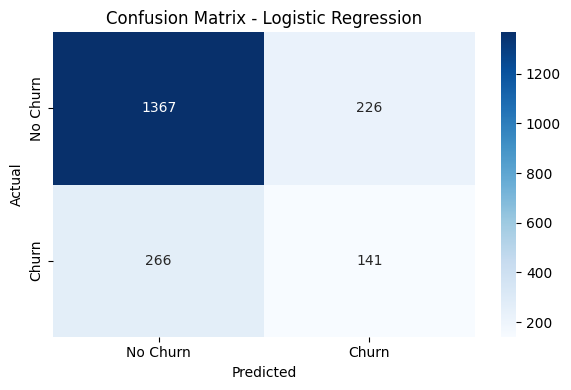

In [29]:
# Plot confusion matrix for Logistic Regression.
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

##### Random Forest

In [30]:
# Train and evaluate a Random Forest model.
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

In [31]:
# Print the accuracy and classification report for Random Forest.
print(" === Random Forest === ")
print("\nRandom Forest Accuracy : ", acc_rf)
print("\nClassification Report: \n", classification_report(y_test, y_pred_rf))

 === Random Forest === 

Random Forest Accuracy :  0.857

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      1593
           1       0.85      0.36      0.51       407

    accuracy                           0.86      2000
   macro avg       0.86      0.67      0.71      2000
weighted avg       0.86      0.86      0.83      2000



In [32]:
# Confusion matrix for Random Forest.
cm = confusion_matrix(y_test, y_pred_rf)

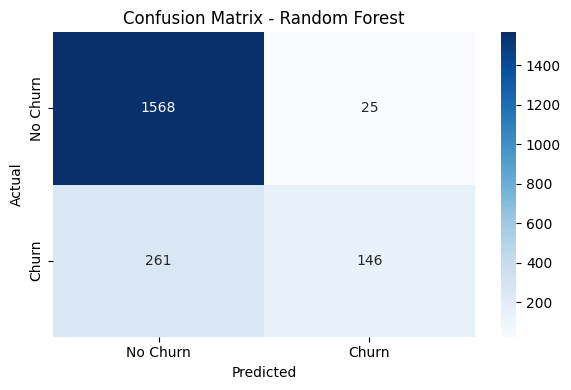

In [33]:
# Plot confusion matrix for Random Forest.
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

##### Gradient Boosting

In [34]:
# Train and evaluate a Gradient Boosting model.
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
acc_gb = accuracy_score(y_test, y_pred_gb)

In [35]:
# Print the accuracy and classification report for Gradient Boosting.
print(" === Gradient Boosting === ")
print("\nGradient Boosting Accuracy : ", acc_gb)
print("\nClassification Report: \n", classification_report(y_test, y_pred_gb))

 === Gradient Boosting === 

Gradient Boosting Accuracy :  0.8635

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.77      0.47      0.58       407

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000



In [36]:
# Confusion matrix for Gradient Boosting.
cm = confusion_matrix(y_test, y_pred_gb)

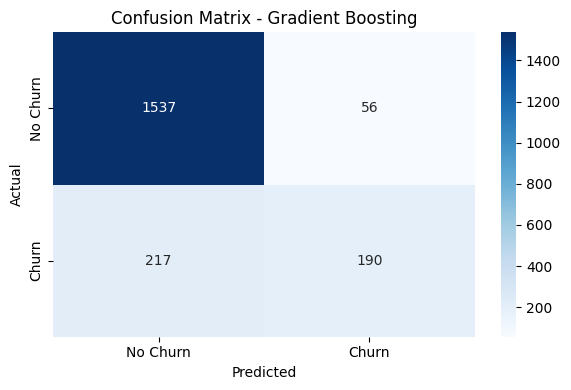

In [37]:
# Plot confusion matrix for Gradient Boosting.
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

### Model Comparison for getting best model  

In [38]:
# Create a dictionary to store the results of the models.
results = {
    "Logistic Regression": acc_lr,
    "Random Forest": acc_rf,
    "Gradient Boosting": acc_gb
}

In [39]:
# Find the best model based on accuracy and print the results.
best_model_name = max(results, key=results.get)
print(f"\nBest Model: {best_model_name} with Accuracy: {results[best_model_name]:.4f}")


Best Model: Gradient Boosting with Accuracy: 0.8635


### Hyperparameter Tuning

In [40]:
# Define parameter grids for hyperparameter tuning with possible values.
param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1],
        'solver': ['liblinear', 'lbfgs'],
        'penalty': ['l2']
    },
    "Random Forest": {
        'n_estimators': [100, 200],
        'max_depth': [8, 10, None],
        'min_samples_split': [2, 5]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    }
}

In [41]:
# Initialize the model object based on the best model name.
if best_model_name == "Logistic Regression":
    model_obj = LogisticRegression(max_iter=1000)
elif best_model_name == "Random Forest":
    model_obj = RandomForestClassifier(random_state=42)
elif best_model_name == "Gradient Boosting":
    model_obj = GradientBoostingClassifier(random_state=42)

In [42]:
# Create a StratifiedKFold object for cross-validation.
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
param_grid = param_grids[best_model_name]

In [43]:
# Perform hyperparameter tuning using GridSearchCV.
grid = GridSearchCV(model_obj, param_grid, cv=cv, scoring='accuracy', n_jobs=1, verbose=1)
grid.fit(X_train, y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=42, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=42), n_jobs=1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [44]:
# Find the best model based on the grid search and make predictions.
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

In [45]:
# Print the tuned accuracy and classification report for the best model.
print(" === Best Model After Tuning === ")
print("\nTuned Accuracy : ", accuracy_score(y_test, y_pred_best))
print("\nClassification Report: \n", classification_report(y_test, y_pred_best))

 === Best Model After Tuning === 

Tuned Accuracy :  0.867

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.47      0.59       407

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.85      2000



### Feature Importance

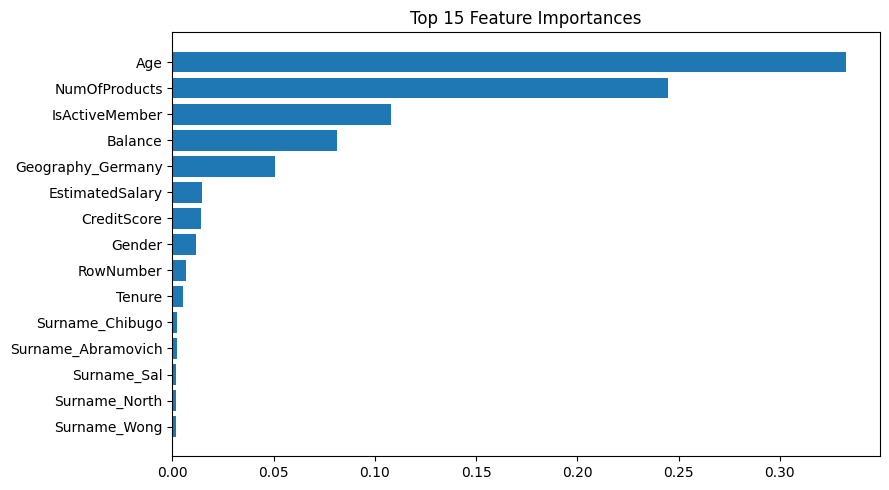

In [46]:
# # Plot important features if applicable.
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[-15:]
    plt.figure(figsize=(9, 5))
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
    plt.title("Top 15 Feature Importances")
    plt.tight_layout()
    plt.show()

### Computing and Plotting ROC Curve

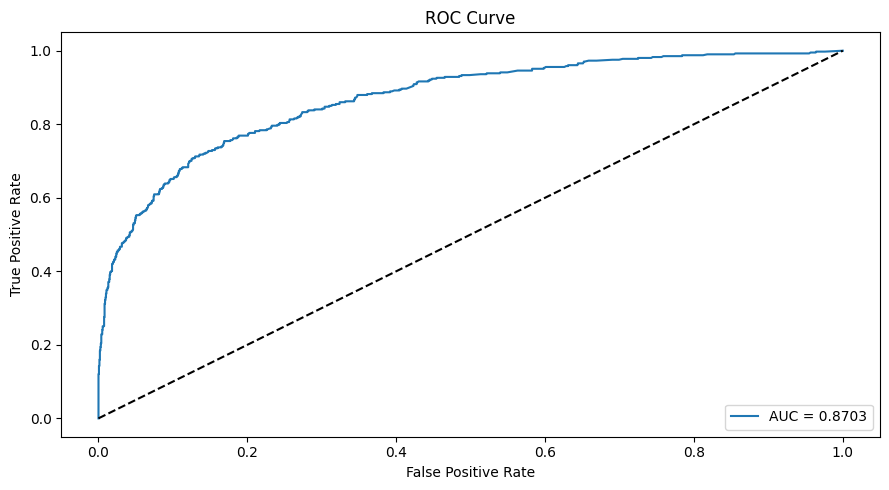

In [47]:
# Plot ROC curve for the best model.
y_probs = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(9, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_probs):.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

### Cross Validation Scores

In [48]:
# Perform cross-validation to evaluate the best model.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(best_model, X_scaled, y, cv=cv, scoring='accuracy')
print(f"Cross-validation Accuracy: {scores.mean()} ± {scores.std()}")

Cross-validation Accuracy: 0.8621000000000001 ± 0.006327716807822573
